## Load the tokenized Paradise Lost and find the top 20 words, make sure to exclude stop words and either stem or lemmatize your text

In [1]:
import nltk

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [20]:
paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')
paradise[:50]

['[',
 'Paradise',
 'Lost',
 'by',
 'John',
 'Milton',
 '1667',
 ']',
 'Book',
 'I',
 'Of',
 'Man',
 "'",
 's',
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'Of',
 'that',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'into',
 'the',
 'World',
 ',',
 'and',
 'all',
 'our',
 'woe',
 ',',
 'With',
 'loss',
 'of',
 'Eden',
 ',',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'us',
 ',']

In [28]:
# create variable containing stop words
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Since Paradise Lost is an older text I thought it especially important to consider context when converting words so I decided to go with lemmatization instead of stemming

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_list = [lemmatizer.lemmatize(x) for x in new_filtered_list]
print(lemmatized_list)
lemmatizer.lemmatize('witnessed')

['doom', 'Reserved', 'wrath', 'thought', 'lost', 'happiness', 'lasting', 'pain', 'Torments', 'round', 'throw', 'baleful', 'eye', 'witnessed', 'huge', 'affliction', 'dismay', 'Mixed', 'obdurate', 'pride', 'steadfast', 'hate']


'witnessed'

In [26]:
filtered_list2 = [w.lower() for w in paradise if w.lower() not in sw]
new_filtered_list2 = [word for word in filtered_list2 if word.isalnum()]
#print(new_filtered_list2)
lemmatized_list2 = [lemmatizer.lemmatize(x) for x in new_filtered_list2]
#print(lemmatized_list2)

In [27]:
from collections import Counter
Counter(lemmatized_list2).most_common(20)

[('heaven', 436),
 ('thou', 432),
 ('thy', 414),
 ('thee', 358),
 ('thus', 318),
 ('god', 316),
 ('shall', 283),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('u', 187),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('may', 126)]

In [36]:
sw.add('thou')
sw.add('thy')
sw.add('thee')
sw.add('thus')
sw.add('us')

filtered_list2 = [w.lower() for w in paradise if w.lower() not in sw]
new_filtered_list2 = [word for word in filtered_list2 if word.isalnum()]
#print(new_filtered_list2)
lemmatized_list2 = [lemmatizer.lemmatize(x) for x in new_filtered_list2]
#print(lemmatized_list2)
top_words = Counter(lemmatized_list2).most_common(20)
top_words

[('heaven', 436),
 ('god', 316),
 ('shall', 283),
 ('yet', 228),
 ('earth', 217),
 ('though', 217),
 ('man', 176),
 ('first', 175),
 ('day', 157),
 ('high', 153),
 ('one', 142),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('may', 126),
 ('power', 125),
 ('great', 123),
 ('till', 120),
 ('like', 120),
 ('world', 119)]

In [37]:
import pandas as pd
word_df = pd.DataFrame(top_words, columns=['word', 'count'])
word_df

,word,count
0,heaven,436
1,god,316
2,shall,283
3,yet,228
4,earth,217
5,though,217
6,man,176
7,first,175
8,day,157
9,high,153


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors


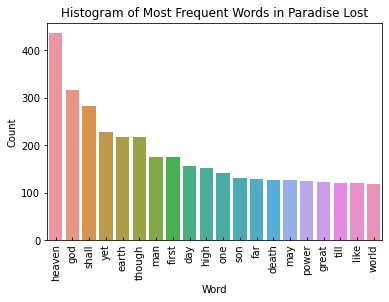

In [62]:
fig, ax = plt.subplots()

#ax.xaxis.set(ticklabels)
ax = sns.barplot(x='word', y='count', data = word_df)
ax.set(title='Histogram of Most Frequent Words in Paradise Lost',
      ylabel='Count',
      xlabel='Word')
ax.tick_params(axis='x', direction='in')
plt.xticks(rotation='vertical')
#ax.set_xticklabels(rotation=45)
plt.show(g)

## 4. Perform Vader Sentiment Analysis and find the top 5 negative, positive and neutral sentences.

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

In [146]:
# create text sentences
#leave off the title by indexing from 1 since the title is in its own list
#also leave off "The end" because it's also a list
sentiments=[]
text_sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")[1:-2]
for sentence in text_sentences:
    new_sentence = ' '.join(word for word in sentence)
    #print(new_sentence)
    
    sentiment = analyzer.polarity_scores(new_sentence)
    #print(sentiment)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    sentiments.append({
            "text":new_sentence,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
    })
    #print(sentiments)


In [147]:
sentiment_df = pd.DataFrame(sentiments)
sentiment_df.head()

,text,compound,positive,negative,neutral
0,Book I,0.0000,0.000,0.000,1.000
1,"Of Man ' s first disobedience , and the fruit ...",0.8885,0.192,0.117,0.691
2,"And chiefly thou , O Spirit , that dost prefer...",0.7331,0.163,0.085,0.752
3,Say first -- for Heaven hides nothing from thy...,0.8689,0.239,0.093,0.668
4,Who first seduced them to that foul revolt ?,-0.3612,0.000,0.263,0.737


In [149]:
sentiment_df.sort_values('positive', ascending=False).head()

,text,compound,positive,negative,neutral
827,O Heaven !,0.5562,1.000,0.0,0.000
907,O Friends !,0.5255,1.000,0.0,0.000
604,O friends !,0.5255,1.000,0.0,0.000
1440,O Heaven !,0.5562,1.000,0.0,0.000
1232,"She fair , divinely fair , fit love for Gods !",0.9381,0.838,0.0,0.162


In [150]:
sentiment_df.sort_values('negative', ascending=False).head()

,text,compound,positive,negative,neutral
152,No !,-0.3595,0.0,1.000,0.000
511,O Hell !,-0.7088,0.0,1.000,0.000
1688,Alas !,-0.3382,0.0,1.000,0.000
477,Me miserable !,-0.5411,0.0,0.777,0.223
174,Sad cure !,-0.5255,0.0,0.772,0.228


In [151]:
sentiment_df.sort_values('neutral', ascending=False).head()

,text,compound,positive,negative,neutral
0,Book I,0.0,0.0,0.0,1.0
1125,To whom the Angel with contracted brow .,0.0,0.0,0.0,1.0
1094,"Hast thou not made me here thy substitute , An...",0.0,0.0,0.0,1.0
1100,"What thinkest thou then of me , and this my st...",0.0,0.0,0.0,1.0
1116,but fairest this Of all thy gifts !,0.0,0.0,0.0,1.0


## 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

I think the sentences seem pretty accurate for the positive and negative sentences although they're all very short sentences, and two of them are the same. I also wonder if it did a better job with the shorter sentences because Vader Sentiment Analysis is intended for short bits of text like Tweets.